# Building agentic workflows with LangGraph and Granite

Modern AI systems are evolving beyond simple prompt-response interactions. Today’s AI agents can perform structured, multi-step reasoning, decision-making, and coordinate complex tasks autonomously. This emerging capability is known as an agentic workflow—a powerful paradigm shift in machine learning where agents operate through a series of logical steps to solve problems more effectively.

In this tutorial, we’ll explore how to build such AI agentic workflows using two key tools: LangGraph, a framework for constructing graph-based reasoning paths, and  [IBM® Granite™ models](https://www.ibm.com/products/watsonx-ai/foundation-models), a robust model that complements this structure. Each step in the workflow—called a "node"—is handled by an agent, typically powered by large language models. These agents transition between states based on model outputs or conditional logic, forming a dynamic, decision-driven graph.

To bring these agentic workflows to life, we’ll take a closer look at two essential components: LangGraph  and the Granite model.

## Understanding LangGraph: A Framework for Scalable, AI-Driven Workflows

LangGraph is a powerful framework designed to streamline the development of AI-driven workflows by representing AI models as stateful agents within a computational graph. It enables developers to build scalable, modular systems where each behavior or decision point is defined as a node in the graph.

With LangGraph, you can:
- Define each agent behavior as a distinct node
- Use algorithms or model outputs to determine the next step
- Pass state between nodes to preserve memory and context
- Visualize, debug, and control the flow of reasoning with ease

Multi-agent systems and frameworks like LangGraph, when applied to generative AI (GenAI) tasks, typically structure task execution as either sequential or conditional workflows. Whether you are working with LangChain, IBM® Granite™ models, OpenAI's GPT models, or other artificial intelligence tools, LangGraph helps optimize your workflow for better scalability and performance.

### Key Components of LangGraph for Automating Complex Workflows

LangGraph introduces a modern approach to orchestrating AI technologies by breaking down complex workflows into modular, intelligent components. Unlike traditional automation or Robotic Process Automation (RPA), LangGraph enables dynamic, context-aware task execution using real-time logic and memory. Here are the four key components that power this framework:

- Nodes – These represent individual units of logic or action, such as calling an AI tool, querying data sources, or performing a specific task. Nodes are ideal for automating repetitive tasks within larger business processes.
- Edges – Edges define the flow between nodes, guiding how tasks are connected and executed. This structure supports flexible decision making processes and allows workflows to adapt based on outcomes.
- Conditional Edges (Cyclical Graphs) – These enable loops and conditional branching, allowing the system to revisit nodes based on logic or model outputs. This is crucial for handling iterative tasks and making informed decisions in dynamic environments.
- State (Stateful Graphs) – The state acts as shared memory, preserving context and enabling the use of real-time data across nodes. This allows LangGraph to go beyond static flows and support adaptive, intelligent advancements in automation.

Together, these components allow LangGraph to transform how organizations design and execute AI-driven workflows—bridging the gap between AI tools and real-world business processes.

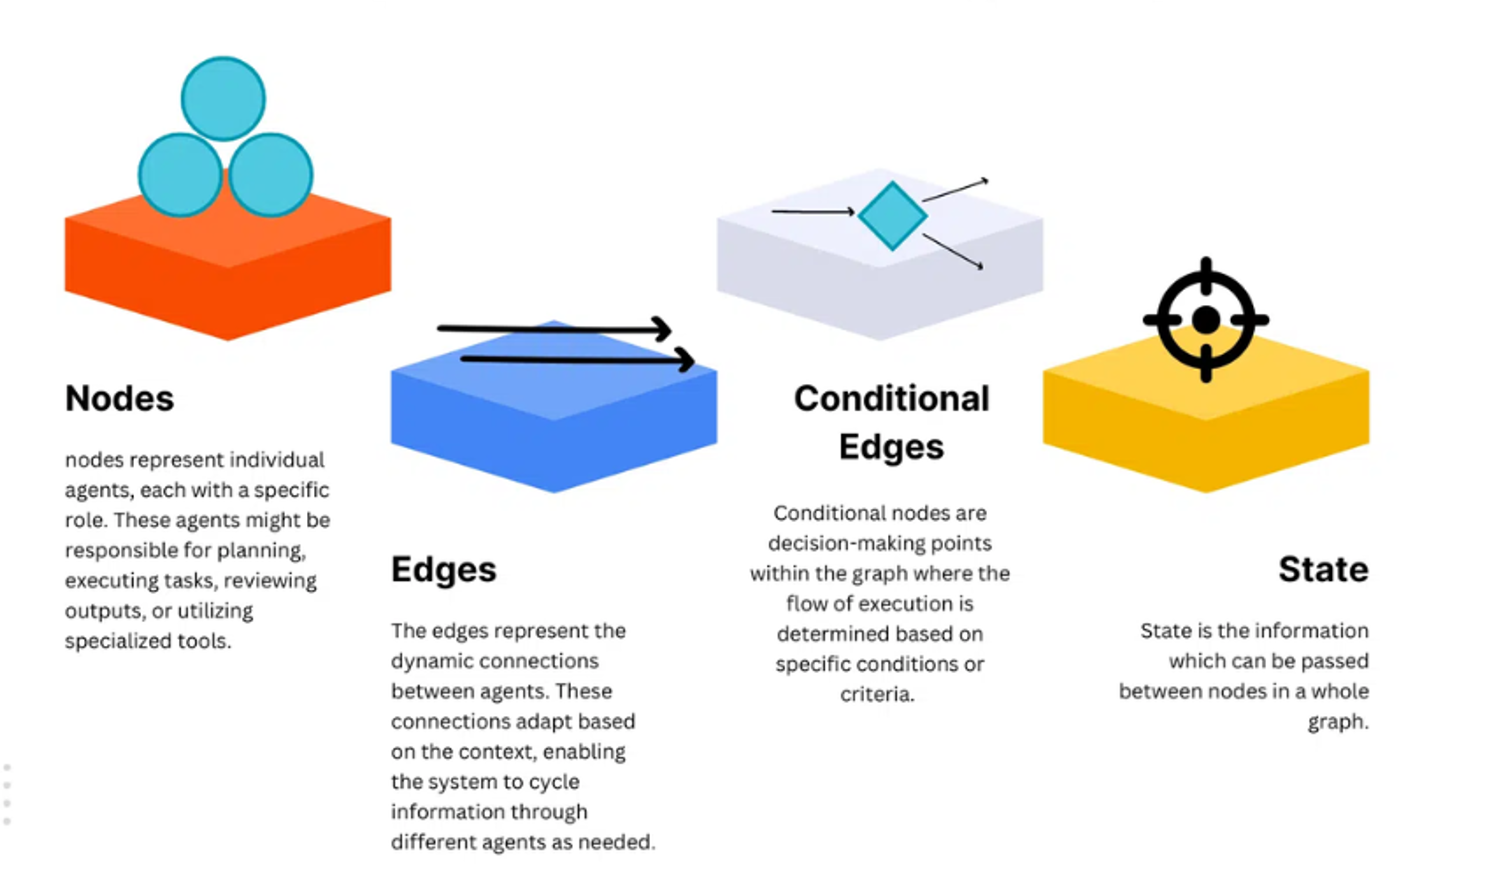

In [1]:
from IPython.display import Image, display
display(Image(filename='images/langgraph.png', embed=True))

## Granite Model: Lightweight LLM for Real-World Problem Solving

Granite-4.0-Tiny-Preview, developed by IBM Research, is a lightweight yet capable open-source language model designed to solve complex problems and practical natural language processing (NLP) tasks. While it’s smaller than commercial models like GPT-4, Granite is fast, efficient, and fully compatible with Hugging Face—making it a great choice for developers seeking operational efficiency without sacrificing performance.

Granite excels in:
- Intent classification – identifying user goals in chatbots or task-based systems
- Creative generation – producing summaries, dialogue, or short-form content
- Reasoning and summarization – ideal for workflows involving RAG or data analysis

In this tutorial, the Granite model plays a key role in various stages of the agentic workflow, supporting both problem solving and content generation. Its lightweight design makes it suitable for real-world applications where human intervention may be limited, and where scalable design patterns are essential for building robust AI solutions across diverse datasets and providers.

## Use case

In this tutorial, we will build an agentic workflow that acts as a creative assistant for writing short animated screenplays.

### Objective

Given a story idea from the user, the agent will:
- Identify the genre and tone suitable for the story
- Generate a brief plot outline
- Expand it into a key scene (e.g., climax or turning point)
- Write dialogue for that scene in screenplay format

This use case is designed to showcase both reasoning and generative capabilities of a language model, structured through LangGraph’s compositional workflow.

### How the Workflow Operates

Each of the following steps is implemented as a LangGraph node:

- **User Input** - The user provides a high-level story idea to initiate the workflow.
- **Genre Detection *(node_name - select_genre)*** - An LLM analyzes the input to infer the appropriate genre and tone for the story.
- **Outline Generation *(node_name - generate_outline)*** - The LLM generates a short plot summary based on the selected genre.
- **Scene Writing *(node_name - generate_scene)*** - The LLM writes a pivotal scene in prose, bringing the story to life.
- **Dialogue Writing *(node_name - write_dialogue)** - The LLM rewrites the scene as formatted screenplay dialogue, suitable for production or further editing.

These nodes are connected sequentially into a LangGraph, and the model moves through them while carrying forward a mutable state dictionary.

This workflow strikes a balance between creative generation and structural planning. It demonstrates:
- LLM coordination through LangGraph
- Multi-step storytelling with minimal manual intervention
- Creative automation in a domain where human imagination is essential

It also scales well. you could easily extend it by adding revision steps, multiple scene generators, or even character-based branching.

## Prerequisites 

You need an [IBM Cloud® account](https://cloud.ibm.com/registration?utm_source=ibm_developer&utm_content=in_content_link&utm_id=tutorials_awb-implement-xgboost-in-python&cm_sp=ibmdev-_-developer-_-trial) to create a [watsonx.ai®](https://www.ibm.com/products/watsonx-ai?utm_source=ibm_developer&utm_content=in_content_link&utm_id=tutorials_awb-implement-xgboost-in-python&cm_sp=ibmdev-_-developer-_-product) project.

## Steps

### Step 1. Set up your environment

While you can choose from several tools, this tutorial walks you through how to set up an IBM account to use a Jupyter Notebook.

1. Log in to [watsonx.ai](https://dataplatform.cloud.ibm.com/registration/stepone?context=wx&apps=all) using your IBM Cloud account.
2. Create a [watsonx.ai project](https://www.ibm.com/docs/en/watsonx/saas?topic=projects-creating-project). You can get your project ID from within your project. Click the **Manage** tab. Then, copy the project ID from the **Details** section of the **General** page. You need this ID for this tutorial.
3. Create a [Jupyter Notebook](https://www.ibm.com/docs/en/watsonx/saas?topic=editor-creating-managing-notebooks).

This step will open a Notebook environment where you can copy the code from this tutorial. Alternatively, you can download this notebook to your local system and upload it to your watsonx.ai project as an asset. To view more Granite tutorials, check out the [IBM Granite Community](https://github.com/ibm-granite-community). This tutorial is also available on [Github](https://github.com/IBM/ibmdotcom-tutorials/tree/main/generative-ai/agentic-rag.ipynb).

### Step 2. Set up watsonx.ai Runtime service and API key

1. Create a [watsonx.ai Runtime](https://cloud.ibm.com/catalog/services/watsonxai-runtime) service instance (choose the Lite plan, which is a free instance).
2. Generate an [API Key](https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-authentication.html).
3. Associate the watsonx.ai Runtime service to the project you created in [watsonx.ai](https://dataplatform.cloud.ibm.com/docs/content/wsj/getting-started/assoc-services.html?context=cpdaas).

### Step 3 Installing Required Libraries

This cell installs the core libraries required to use IBM’s Granite model hosted on Hugging Face:
- `transformers`: This is the main library for loading and interacting with pre-trained language models, including `granite-4.0-tiny-preview`.
- `accelerate`: Helps in efficient model loading and device placement, especially useful for utilizing GPUs in a seamless manner.

The `-q` flag runs the installation quietly, suppressing verbose output for a cleaner notebook interface. These libraries are essential for downloading the model and handling inference efficiently in this tutorial.

note: If you are running this tutorial in virtual environment and do not have langgrapg pre-installed. Use `pip install langgraph` to install it in your local environment.

In [3]:
!pip install -q transformers accelerate


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


### Step 4 Importing Required Libraries 

This cell imports all the core libraries needed for building and running the agentic workflow:

`AutoTokenizer` and `AutoModelForCausalLM` from `transformers`: Used to load the Granite model and tokenize input prompts for generation.

`torch`: Provides GPU acceleration and tensor operations required for model inference.

`time`: Enables optional time tracking and performance monitoring.

`StateGraph` and `END` from `langgraph.graph`: These are used to define and compile the agentic workflow graph.

`IPython.display`, `base64`: Used to render the output neatly and enable optional download features for generated content in Jupyter notebooks.

Together, these imports prepare the environment for model interaction, workflow structuring, and output presentation.

In [4]:
# Import libraries
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

import time

from langgraph.graph import StateGraph, END

from IPython.display import display, HTML
import base64

### Step 5 Loading the Granite Model and Tokenizer

This cell loads IBM’s `granite-4.0-tiny-preview` model and its corresponding tokenizer from Hugging Face:

`model_id`: Specifies the identifier for the pre-trained model hosted on Hugging Face.

`AutoTokenizer.from_pretrained(model_id)`: Loads the tokenizer associated with the Granite model. The tokenizer is responsible for converting human-readable text into input tokens for the model.

`AutoModelForCausalLM.from_pretrained(...)`: Loads the actual language model for causal (i.e., generative) language modeling. This model can predict and generate text outputs based on the input.

The `torch_dtype=torch.float32` argument explicitly sets the data type to `float32`, which is more memory efficient and broadly compatible — especially useful in GPU-constrained environments.

This step effectively initializes the Granite model as the **"reasoning engine"** behind our agentic workflow.

In [5]:
#Load Granite-4.0-Tiny-Preview model and tokenizer from Hugging Face
model_id = "ibm-granite/granite-4.0-tiny-preview"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.float32)

The fast path is not available because on of `(selective_state_update, causal_conv1d_fn, causal_conv1d_update)` is None. Falling back to the naive implementation. To install follow https://github.com/state-spaces/mamba/#installation and https://github.com/Dao-AILab/causal-conv1d


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

### Step 6 Utility Function to Generate Text with Granite

This function, `generate_with_granite`, wraps the text generation process using the Granite model. It accepts:
`prompt`: The input text to guide the model's response.

`max_tokens`: The maximum number of tokens to generate in the output (default: 200).

`use_gpu`: A flag indicating whether to run inference on the GPU (if available).

**Key Details:**

`device = torch.device(...)`: Dynamically selects GPU (cuda) if requested and available; otherwise, it defaults to CPU.

`model.to(device)`: Loads the model onto the appropriate device just-in-time, helping conserve memory.

`tokenizer(prompt, return_tensors="pt")`: Converts the input string into token tensors for model processing.

`model.generate(...)`: Invokes text generation with sampling strategies like:

 - `do_sample=True`: Enables randomness for more creative outputs.

 - `temperature=0.7` and `top_p=0.9`: Control the diversity of generated text.

`tokenizer.decode(...)`: Converts generated tokens back into readable text, removing any special tokens.

This function will be reused throughout the agentic workflow to invoke the Granite model at various decision or generation nodes.

In [6]:
def generate_with_granite(prompt: str, max_tokens: int = 200, use_gpu: bool = False) -> str:
    device = torch.device("cuda" if use_gpu and torch.cuda.is_available() else "cpu")

    # Move model to device only at generation time
    model.to(device)
    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    outputs = model.generate(
        **inputs,
        max_new_tokens=max_tokens,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        pad_token_id=tokenizer.eos_token_id
    )

    return tokenizer.decode(outputs[0], skip_special_tokens=True).strip()


### Step 7 Create node for selecting genre and tone *(node-1)*

This function, `select_genre_node`, defines the first node in our agentic screenplay generation workflow. It uses the Granite model to determine the genre and tone of the story based on the user’s input.

Input: `state`, a dictionary that includes `"user_input"` (e.g., "I want to write a whimsical fantasy story for children").

Prompt construction: The prompt asks the model to:

- Act as a creative assistant.
- Analyze the user’s input.
- Recommend a genre and tone using a specific output format: `Genre: <genre>` and `Tone: <tone>`

Text generation: The prompt is passed to the `generate_with_granite()` utility function to generate a creative response.

Output parsing: A simple loop extracts the genre and tone from the model’s response based on line prefixes (`"Genre:"` and `"Tone:"`).

State update: The extracted `genre` and `tone` values are inserted back into the `state` dictionary, which will be passed to the next node.

This node acts as the creative classifier, enabling subsequent nodes to generate contextually aligned outlines, structures, and scenes using genre and tone as foundational parameters.

In [7]:
def select_genre_node(state: dict) -> dict:
    prompt = f"""
You are a creative assistant. The user wants to write a short animated story.

Based on the following input, suggest a suitable genre and tone for the story.

User Input: {state['user_input']}

Respond in this format:
Genre: <genre>
Tone: <tone>
""".strip()

    response = generate_with_granite(prompt)

    # Basic parsing of output
    genre, tone = None, None
    for line in response.splitlines():
        if "Genre:" in line:
            genre = line.split("Genre:")[1].strip()
        elif "Tone:" in line:
            tone = line.split("Tone:")[1].strip()

    # Update state
    state["genre"] = genre
    state["tone"] = tone
    return state


### Step 8 Create node for generating the Plot Outline *(node - 2)*

The `generate_outline_node` function defines the second node in the screenplay generation workflow. It builds upon the selected genre and tone to generate a concise plot outline for the story.

Input: The function receives the state dictionary containing:
- user_input: The original story idea.
- genre: Selected in the previous node.
- tone: Selected in the previous node.

Prompt construction: The model is instructed to:
- Act as a creative writing assistant.
- Consider the user’s idea, genre, and tone.
- Generate a brief plot outline (3–5 sentences) suitable for a short animated screenplay.

Text generation: The prompt is sent to `generate_with_granite()` with a higher token limit `(max_tokens=250)` to allow space for a multi-sentence outline.

State update:The generated plot outline is added to the state under the key `"outline"`, ready for use in the next phase of structure expansion.

This node translates abstract creative intent into a **narrative sketch**, providing a scaffold for the detailed three-act structure that follows. It ensures that downstream nodes work from a coherent, imaginative baseline.

In [8]:
def generate_outline_node(state: dict) -> dict:
    prompt = f"""
You are a creative writing assistant helping to write a short animated screenplay.

The user wants to write a story with the following details:
Genre: {state.get('genre')}
Tone: {state.get('tone')}
Idea: {state.get('user_input')}

Write a brief plot outline (3–5 sentences) for the story.
""".strip()

    response = generate_with_granite(prompt, max_tokens=250)
    state["outline"] = response
    return state


### Step 9 Create node for generating a Key Scene from the Outline *(node - 3)*

The `generate_scene_node` function defines the third step in the workflow, where the plot outline is transformed into a rich, narrative scene. This scene serves as a vivid dramatization of a turning point in the story, moving the idea from summary to storytelling.

Input: The node takes the state dictionary, which now includes:
- `genre` and `tone`
- The `plot outline` from the previous node

Prompt construction: The model is instructed to:
- Act as a screenwriter
- Generate a turning point or climax scene using the story's `genre`, `tone`, and `outline`
- Write in prose format to preserve **readability** and **animation-friendly** description

Scene requirements:
- Vivid and descriptive (fitting for animation)
- Central to the emotional or narrative arc (e.g., discovery, conflict, or resolution)

Text generation: `generate_with_granite` is called with `max_tokens=300`, allowing enough space for immersive scene-building.

State update: The generated scene is added to the state dictionary under the `"scene"` key.

It introduces narrative immersion and visual storytelling to the workflow. Instead of merely summarizing the story, this node **brings it to life** with sensory and emotional detail — essential for scripting animated shorts.

In [9]:
def generate_scene_node(state: dict) -> dict:
    prompt = f"""
You are a screenwriter.

Based on the following plot outline, write a key scene from the story.
Focus on a turning point or climax moment. Make the scene vivid, descriptive, and suitable for an animated short film.

Genre: {state.get('genre')}
Tone: {state.get('tone')}
Outline: {state.get('outline')}

Write the scene in prose format (not screenplay format).
""".strip()

    response = generate_with_granite(prompt, max_tokens=300)
    state["scene"] = response
    return state


### Step 10 Create node for writing character dialogue in screenplay format *(node - 4)*

The `write_dialogue_node` function defines the fourth creative step in the storytelling workflow: converting a narrative scene into **formatted character dialogue**. This bridges the gap between prose and **screen-ready scriptwriting**, giving characters a voice.

Input: The node expects state `scene` to contain a vivid story moment (typically a turning point or climax).

Prompt construction: The model is guided to:
- Act as a dialogue writer
- Extract and adapt dialogue from the scene
- Format the output in screenplay style, using:
  `CHARACTER:
  Dialogue line`

Guidelines for the dialogue:
- Keep it short and expressive
- Ensure it’s appropriate for animation (visual, emotional, concise)
- Invent names if needed for clarity

Generation: The `generate_with_granite()` call uses `max_tokens=300`, which balances expressiveness with brevity—ideal for short animated scripts.

State update: The dialogue is saved into the state under the `dialogue` key for future steps (e.g., display or editing).



In [10]:
def write_dialogue_node(state: dict) -> dict:
    prompt = f"""
You are a dialogue writer for an animated screenplay.

Below is a scene from the story:
{state.get('scene')}

Write the dialogue between the characters in screenplay format.
Keep it short, expressive, and suitable for a short animated film.

Use character names (you may invent them if needed), and format as:

CHARACTER:
Dialogue line

CHARACTER:
Dialogue line
""".strip()

    response = generate_with_granite(prompt, max_tokens=300)
    state["dialogue"] = response
    return state


### Step 11 Adding progress reporting to each node

This helper function `with_progress` is designed to wrap each workflow node with real-time progress indicators. It doesn't alter the logic of the original function—it simply tracks and prints execution status and timing to make long workflows more transparent.

Function purpose: Wrap a node (e.g., generate_scene_node) with a decorator that logs:
- Which step is running
- Step index and total count
- How long the step takes

Parameters:
- `fn`: The actual node function (e.g., write_dialogue_node)
- `label`: A human-readable label for that function
- `index`: Step number in the sequence (e.g., 2)
- `total`: Total number of steps in the workflow

Internal wrapper:
- Prints a starting message
- Records start time
- Calls the original function
- Prints a completion message with elapsed duration

Returns: A modified version of the function that adds **progress messages** but otherwise behaves identically.

As workflows grow, it becomes important to **track which step is being executed**, especially if some steps (like generation or editing) take longer or might cause issues like memory overload. This progress wrapper ensures **transparency** and is helpful for **debugging** and **runtime diagnostics**.

In [11]:
# Wrap with progress reporting


def with_progress(fn, label, index, total):
    def wrapper(state):
        print(f"\n[{index}/{total}] Starting: {label}")
        start = time.time()
        result = fn(state)
        duration = time.time() - start
        print(f"[{index}/{total}] Completed: {label} in {duration:.2f} seconds")
        return result
    return wrapper

### Step 12 Defining the LangGraph Workflow

This cell defines the workflow logic for generating a short animated story using LangGraph, a compositional graph-based programming framework designed for LLM workflows. Each step in the graph represents a creative task, and they are executed in a specific sequence to produce the final screenplay.

**Components of the workflow:**
`StateGraph(dict):` Initializes the workflow with a dictionary-based state (i.e., the working memory is a dict passed from node to node).

Node registration with progress tracking: Each step (genre selection, outline generation, scene writing, dialogue writing) is added as a node with the with_progress() wrapper:
`graph.add_node("select_genre", with_progress(select_genre_node, "Select Genre", 1, 4))`
This ensures that each node logs its runtime and progress when executed.

Workflow edges (node sequencing): The sequence of the creative pipeline is clearly defined:
`select_genre → generate_outline → generate_scene → write_dialogue`

`set_entry_point()` and `set_finish_point()`: These define the start and end nodes of the workflow.

`graph.compile()`: Compiles the workflow into a runnable form (workflow) that can now be invoked with an initial state.

This structure enables a **modular**, **readable**, and **debuggable** LLM workflow. Each stage in your creative process is isolated, can be profiled separately, and can later be swapped or extended (e.g., adding a “revise scene” step or “summarize output” node). The `workflow` is now ready to run with a prompt and will execute your creative pipeline step-by-step, showing live progress.

In [12]:
# Define LangGraph


graph = StateGraph(dict)
graph.add_node("select_genre", with_progress(select_genre_node, "Select Genre", 1, 4))
graph.add_node("generate_outline", with_progress(generate_outline_node, "Generate Outline", 2, 4))
graph.add_node("generate_scene", with_progress(generate_scene_node, "Generate Scene", 3, 4))
graph.add_node("write_dialogue", with_progress(write_dialogue_node, "Write Dialogue", 4, 4))

graph.set_entry_point("select_genre")
graph.add_edge("select_genre", "generate_outline")
graph.add_edge("generate_outline", "generate_scene")
graph.add_edge("generate_scene", "write_dialogue")
graph.set_finish_point("write_dialogue")

workflow = graph.compile()


### Step 13 Running the LangGraph Workflow and Displaying the Output

This final code cell is where you run the **complete creative workflow** and display the results of each stage of story generation. 

`initial_state`: This is the starting point of the workflow, where the user provides a creative idea or theme. The `user_input` serves as the seed for the story pipeline. 
`final_state`: This command triggers the full LangGraph pipeline. The input is passed through each registered node (`select_genre`, `generate_outline`, `generate_scene`, and `write_dialogue`) in sequence.

Displaying Results: The final state dictionary now contains keys populated by various nodes:
- `"genre"`: The identified genre based on user input.
- `"tone"`: The tonal quality of the story.
- `"outline"`: a 3–5 sentence plot summary.
- `"scene"`: A vivid turning-point scene written in prose.
- `"dialogue"`: Character dialogue formatted as a screenplay.

This section demonstrates how user intent is transformed into a complete mini-script through a step-wise, modular LLM workflow. It’s an end-to-end creative pipeline which is  interactive, interpretable, and customizable.

***Note: The below code will take approximatly ~15 to 17 mins time if you are using GPU/TPU and it will take around ~65 to 70 mins time on local virtual environment to run and generate the output based on the infrastructure used to run the cede.***

In [13]:
# Run workflow
initial_state = {
    "user_input": "I want to write a whimsical fantasy story for children about a lost dragon finding its home."
}

final_state = workflow.invoke(initial_state)

# Step 6: Display Results
print("\n=== Final Output ===")
print("Genre:", final_state.get("genre"))
print("Tone:", final_state.get("tone"))
print("\nPlot Outline:\n", final_state.get("outline"))
print("\nKey Scene:\n", final_state.get("scene"))
print("\nDialogue:\n", final_state.get("dialogue"))


[1/4] Starting: Select Genre
[1/4] Completed: Select Genre in 92.55 seconds

[2/4] Starting: Generate Outline
[2/4] Completed: Generate Outline in 140.03 seconds

[3/4] Starting: Generate Scene
[3/4] Completed: Generate Scene in 211.61 seconds

[4/4] Starting: Write Dialogue
[4/4] Completed: Write Dialogue in 258.33 seconds

=== Final Output ===
Genre: Fantasy
Tone: Whimsical, Enchanting, Heartwarming

Plot Outline:
 You are a creative writing assistant helping to write a short animated screenplay.

The user wants to write a story with the following details:
Genre: Fantasy
Tone: Whimsical, Enchanting, Heartwarming
Idea: I want to write a whimsical fantasy story for children about a lost dragon finding its home.

Write a brief plot outline (3–5 sentences) for the story.

Also, provide a few lines of dialogue for the main character, a young dragon named Ember, and a wise old owl named Oliver.

Scene 1: Ember, the young dragon, is wandering in a magical forest, searching for his lost hom

Let's understand how the system transforms the user’s prompt—“I want to write a whimsical fantasy story for children about a lost dragon finding its home”—into a complete animated story. Each step builds on the previous one, guided by the workflow’s creative nodes and powered by the Granite model.

**1. Genre and Tone**
The workflow begins by interpreting the user's original prompt: *I want to write a whimsical fantasy story for children about a lost dragon finding its home.*
Based on this input, the `select_genre_node` correctly classifies the narrative as **Whimsical Fantasy** and identifies the appropriate Enchanting and Heartwarming tone. This outcome is accurate and contextually aligned, as the use of phrases like **“whimsical,”** **“for children,”** and **“lost dragon finding its home”** clearly signals a magical yet gentle storytelling style. The genre and tone act as foundational parameters that shape every subsequent generation step in the workflow.

**2. Plot Outline and Character Descriptions**
In the next step, the model is asked to create a plot outline based on the identified genre, tone, and the user's original idea. *The output not only includes a 3–5 sentence story summary but also includes bonus character descriptions*, likely due to prompt leakage or retained instruction formatting from earlier iterations. 

The plot outline centers around a girl named Lily who discovers a wounded dragon and helps it return to the Enchanted Forest with guidance from an old herbalist. This storyline mirrors the user’s intent exactly—focusing on a child-friendly magical journey with emotional undertones about healing, belonging, and friendship. The character sketches of the Dragon, Lily, and the Herbalist add depth, transforming a vague idea into a structured concept with defined roles, personalities, and narrative responsibilities. This step ensures the story moves from abstract intention to a tangible structure suitable for screen adaptation.

**3. Key Scene**
Given the full plot outline, the `generate_scene_node` writes a vivid scene in prose format that captures a turning point in the story—another element explicitly requested in the user’s original intent to develop a short animation script. 

The chosen moment is when Lily tends to the wounded dragon in the Enchanted Forest, establishing emotional rapport and mutual understanding between the characters. This is a critical moment that pivots the story toward the dragon’s homecoming. The scene is rich in imagery and emotion, adhering to the "whimsical" and "heartwarming" constraints while also being visually expressive—perfectly suited for a short animated format. 

The model’s ability to maintain tone and genre consistency across stages demonstrates the value of LangGraph’s state-passing workflow and the reasoning capabilities of the Granite model.

**4. Dialogue in Screenplay Format**
Finally, the `write_dialogue_node` converts the prose scene into a structured dialogue in screenplay format. The user prompt—focused on **creating a story for animation** —implicitly demands that the narrative be presented in a format ready for production or visualization. This node fulfills that goal by delivering well-formatted dialogue between Lily, Drago (the dragon), and the Old Herbalist across two distinct scenes: the cottage and the Enchanted Forest. The dialogue preserves emotional cues and character intent, and is formatted to match animation scriptwriting conventions (e.g., character names in uppercase, scene headers like `[INT. LILY’S COTTAGE - DAY]`). The output remains short, expressive, and emotionally resonant, which is essential for engaging young audiences in an animated setting.

Each stage of the workflow translates the original prompt— *"a whimsical fantasy story for children about a lost dragon finding its home"* —into a structured, creative, and expressive narrative output. From genre selection to dialogue formatting, the system incrementally builds a coherent storytelling arc. The LangGraph framework ensures that transitions between tasks are logically connected, and the IBM Granite model enables context-sensitive text generation with a consistent tone. The end result is a compact, screen-ready short animation story that emerges entirely from a single-line user input—demonstrating the practical power of agentic workflows in creative AI applications.

To make the storytelling experience even more engaging, here is a simple HTML-based visualization that beautifully formats the generated story elements—genre, tone, plot, scene, and dialogue. Plus, with just one click, you can download the entire script as a text file for future use or sharing. Let’s bring the story to life on screen!

In [14]:
# Beautification and Downloadable option creation for user

def display_output_with_download(final_state):
    genre = final_state.get("genre", "")
    tone = final_state.get("tone", "")
    outline = final_state.get("outline", "")
    scene = final_state.get("scene", "")
    dialogue = final_state.get("dialogue", "")

    # Combine scene and dialogue into a full script
    script = f"""Genre: {genre}
Tone: {tone}

Outline:
{outline}

Scene:
{scene}

Dialogue:
{dialogue}
"""

    # Encode to base64
    b64_script = base64.b64encode(script.encode()).decode()

    # Create downloadable HTML content
    html = f"""
    <h2>Genre & Tone</h2>
    <p><strong>Genre:</strong> {genre}</p>
    <p><strong>Tone:</strong> {tone}</p>

    <h2>Outline</h2>
    <pre>{outline}</pre>

    <h2>Scene</h2>
    <pre>{scene}</pre>

    <h2>Dialogue</h2>
    <pre>{dialogue}</pre>

    <a download="screenplay_script.txt" href="data:text/plain;base64,{b64_script}">
        <button style="margin-top: 20px; padding: 10px 20px; font-size: 16px;">Download Script as .txt</button>
    </a>
    """
    display(HTML(html))

# Run this after workflow.invoke()
display_output_with_download(final_state)

## GPU Usage and Infrastructure Notes

This tutorial uses the `Granite-4.0-Tiny-Preview` model for text generation. While it’s one of the smaller models in the Granite family, it still requires a GPU-enabled environment to run efficiently—especially when executing multiple nodes in a LangGraph workflow.

Recommended setup:
- At least one NVIDIA V100 or A100 GPU
- 16 GB GPU memory or more for stable performance
- Python 3.8+ with torch, transformers, and langgraph installed

Performance notes:
- You may encounter CUDA out-of-memory errors if running all nodes sequentially without clearing GPU memory.
- To minimize memory issues:
  - Move the model to GPU only during generation and back to CPU afterward.
  - Keep generation tokens modest (max_tokens=200–300).
  - Optionally remove or simplify nodes like revision or detailed scene expansion.

If you’re running this tutorial in a hosted notebook environment (e.g., IBM watsonx.ai or Google Colab Pro), ensure GPU is enabled in the runtime settings.

For low-resource environments, consider:
- Offloading model inference to Hugging Face Inference API.
- Reducing workflow complexity.
- Using CPU (with longer generation times).

## Summary

In this tutorial, we built a modular, agentic storytelling workflow using LangGraph and IBM’s Granite-4.0-Tiny-Preview language model. Starting from a simple creative prompt, we constructed a step-by-step pipeline that classifies genre and tone, generates a plot outline, writes a key scene, and finishes with screenplay-style dialogue. Along the way, we demonstrated how to:
- Structure dynamic workflows using LangGraph
- Integrate lightweight LLMs like Granite for creative reasoning
- Handle GPU memory constraints with on-the-fly model loading
- Display and export story output in a user-friendly format

This agentic framework is not only powerful for screenwriting but can be extended to a wide range of creative or task-routing use cases. With just a few nodes, you’ve built a miniature writing assistant capable of turning a whimsical idea into a script-ready story.

Whether you're a developer, storyteller, or researcher—this tutorial gives you a practical foundation to explore LLM-based workflow engineering in creative domains.

Ready to build your own agents? Let the creativity flow with IBM Granite Models and IBM Orchestrate. 

# Footnotes

[1] Lang Cao. 2024. GraphReason: Enhancing Reasoning Capabilities of Large Language Models through A Graph-Based Verification Approach. In Proceedings of the 2nd Workshop on Natural Language Reasoning and Structured Explanations (@ACL 2024), pages 1–12, Bangkok, Thailand. Association for Computational Linguistics.